# Insights from City Supply and Demand Data

## Outline

- [Objective](#objective)
- [Setup](#setup)
- [Data Exploration](#data-exploration)
- [Data Processing](#data-processing)
- [Date of Most Completed Trips](#date-most-trips)
- [Highest Number of Completed Trips within 24 hours](#highest-trips-24)
- [Hour of Most Requests](#hour-most-requests)
- [Percentage of Zeroes on Weekends](#percentage-zeroes-weekends)
- [Weighted Average Ratio of Completed Trips per Driver](#ratio-trips-driver)
- [Busiest 8 Hour Shifts](#busiest-shifts)
- [Driver Supply and Demand](#driver-supply-demand)
- [Highest Zeroes to Eyeballs](#highest-zeroes-eyeballs)
- [Highest Eyeball to Driver](#highest-eyeball-driver)
- [Analysis Time Frame](#analysis-time-frame)
- [Best End Day](#best-end-day)

## Objective <a id='objective'></a>

Given the dataset, the following questions will be answered:

1. Which date had the most completed trips during the two week period?
2. What was the highest number of completed trips within a 24 hour period?
3. Which hour of the day had the most requests during the two week period?
4. What percentage of all zeroes during the two week period occurred on the weekend (Friday at 5 pm to Sunday at 3 am)?
5. What is the weighted average ratio of completed trips per driver during the two week period?
6. In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? A new shift starts every 8 hours. Assume that a driver will work the same shift each day.
7. True or False: Driver supply always increases when demand increases during the two week period.
8. In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?
9. If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?
10. True or False: There are exactly two weeks of data in this analysis.
11. Looking at all of the data, which time might make the most sense to consider a true "end day" instead of midnight? (i.e when are both supply and demand at their natural minimums)

## Setup <a id='setup'></a>

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read dataset
df = pd.read_csv('data/raw/dataset_1.csv')

## Data Exploration <a id='data-exploration'></a>

In [3]:
# Show first 5 rows of DataFrame
df.head()

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,NaN,8,6,0,2,2,14
2,NaN,9,8,3,0,0,14
3,NaN,10,9,2,0,1,14
4,NaN,11,11,1,4,4,11


In [4]:
# Get shape of data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 336
Columns: 7


In [5]:
# Get column names
df.columns

Index(['Date', 'Time (Local)', 'Eyeballs ', 'Zeroes ', 'Completed Trips ',
       'Requests ', 'Unique Drivers'],
      dtype='object')

In [6]:
# Get data types
df.dtypes

Date                object
Time (Local)         int64
Eyeballs             int64
Zeroes               int64
Completed Trips      int64
Requests             int64
Unique Drivers       int64
dtype: object

## Data Processing <a id='data-processing'><a>

In [7]:
# Forward fill missing dates
df = df.ffill()

In [8]:
# Show processed DataFrame
df.head(n=10)

,Date,Time (Local),Eyeballs,Zeroes,Completed Trips,Requests,Unique Drivers
0,10-Sep-12,7,5,0,2,2,9
1,10-Sep-12,8,6,0,2,2,14
2,10-Sep-12,9,8,3,0,0,14
3,10-Sep-12,10,9,2,0,1,14
4,10-Sep-12,11,11,1,4,4,11
5,10-Sep-12,12,12,0,2,2,11
6,10-Sep-12,13,9,1,0,0,9
7,10-Sep-12,14,12,1,0,0,9
8,10-Sep-12,15,11,2,1,2,7
9,10-Sep-12,16,11,2,3,4,6


In [9]:
# Clean column names

# Strip extra spaces
df.columns = df.columns.str.strip()

# Convert to lowercase
df.columns = df.columns.str.lower()

# Replace spaces with underscores
df.columns = df.columns.str.replace(pat=' ', repl='_')

# Remove special characters
df.columns = df.columns.str.replace(pat='[^a-zA-Z0-9_]', repl='', regex=True)

In [10]:
# Show cleaned column names
df.columns

Index(['date', 'time_local', 'eyeballs', 'zeroes', 'completed_trips',
       'requests', 'unique_drivers'],
      dtype='object')

In [11]:
# Create timestamp column
df['timestamp'] = df['date'] + ' ' + df['time_local'].astype(str) + ':00'

In [12]:
# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%d-%b-%y %H:%M')

In [13]:
# Show first 5 rows
df.head()

,date,time_local,eyeballs,zeroes,completed_trips,requests,unique_drivers,timestamp
0,10-Sep-12,7,5,0,2,2,9,2012-09-10 07:00:00
1,10-Sep-12,8,6,0,2,2,14,2012-09-10 08:00:00
2,10-Sep-12,9,8,3,0,0,14,2012-09-10 09:00:00
3,10-Sep-12,10,9,2,0,1,14,2012-09-10 10:00:00
4,10-Sep-12,11,11,1,4,4,11,2012-09-10 11:00:00


## Date of Most Completed Trips <a id='date-most-trips'></a>

Which date had the most completed trips during the two week period?

In [14]:
# Group by date, aggregate sum of numerical columns, find row with maximum completed trips
date_most_trips = df.groupby(by='date', as_index=False)['completed_trips'].sum().query(expr='completed_trips == (completed_trips.max())')['date'].values[0]
date_most_trips

'22-Sep-12'

In [15]:
# Print results
print(f'Date of most completed trips: {date_most_trips}')

Date of most completed trips: 22-Sep-12


## Highest Number of Completed Trips within 24 hours <a id='highest-trips-24'></a>

What was the highest number of completed trips within a 24 hour period?

In [16]:
# Create new DataFrame and drop `date` column
df_q2 = df.drop(columns='date')

In [17]:
# Set `timestamp` column as index
df_q2 = df_q2.set_index(keys='timestamp')

In [18]:
# Calculate rolling sum with forward looking window with 24 observations (hours)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=24)
df_q2 = df_q2.rolling(window=indexer, min_periods=1).sum()

In [19]:
# Get row with highest number of completed trips
df_q2.nlargest(n=1, columns='completed_trips')

,time_local,eyeballs,zeroes,completed_trips,requests,unique_drivers
timestamp,,,,,,
2012-09-21 17:00:00,276.0,1015.0,207.0,278.0,367.0,349.0


In [20]:
# Set time format
time_format = '%Y/%m/%d %H:%M'

# Create time interval column
df_q2['time_interval'] = df_q2.index.strftime(time_format) + ' - ' + (df_q2.index + pd.Timedelta('24 hours')).strftime(time_format)

In [21]:
# Show first 5 rows
df_q2.head()

,time_local,eyeballs,zeroes,completed_trips,requests,unique_drivers,time_interval
timestamp,,,,,,,
2012-09-10 07:00:00,276.0,212.0,38.0,29.0,39.0,150.0,2012/09/10 07:00 - 2012/09/11 07:00
2012-09-10 08:00:00,276.0,217.0,38.0,29.0,39.0,146.0,2012/09/10 08:00 - 2012/09/11 08:00
2012-09-10 09:00:00,276.0,222.0,40.0,27.0,37.0,138.0,2012/09/10 09:00 - 2012/09/11 09:00
2012-09-10 10:00:00,276.0,229.0,39.0,27.0,37.0,130.0,2012/09/10 10:00 - 2012/09/11 10:00
2012-09-10 11:00:00,276.0,232.0,38.0,28.0,37.0,124.0,2012/09/10 11:00 - 2012/09/11 11:00


In [22]:
# Get maximum completed trips
completed_trips = df_q2['completed_trips'].max()

# Get time interval of maximum completed trips
time_interval = df_q2.nlargest(n=1, columns='completed_trips')['time_interval'].values[0]

In [23]:
# Print results
print(f'Number of completed trips: {completed_trips}')
print(f'Time interval: {time_interval}')

Number of completed trips: 278.0
Time interval: 2012/09/21 17:00 - 2012/09/22 17:00


## Hour of Most Requests <a id='hour-most-requests'></a>

Which hour of the day had the most requests during the two week period?

In [24]:
# Get hour of maximum requests
hour_most_requests = df.groupby(by='time_local', as_index=False)['requests'].sum().query(expr='requests == requests.max()')['time_local'].values[0]
hour_most_requests

23

In [25]:
# Print results
print(f'Hour of most requests: {hour_most_requests}')

Hour of most requests: 23


## Percentage of Zeroes on Weekends <a id='percentage-zeroes-weekends'></a>

What percentage of all zeroes during the two week period occurred on the weekend (Friday at 5 pm to Sunday at 3 am)?

In [26]:
# Total zeroes in data
total_zeroes = df['zeroes'].sum()
total_zeroes

1429

In [27]:
# Weekend zeroes in data, given conditions

# Create `day` column
df['day'] = pd.to_datetime(arg=df['date'], format='%d-%b-%y').dt.dayofweek

# Calculate weekend zeroes
weekend_zeroes = df[((df['day'] == 4) & (df['time_local'] >= 17)) | (df['day'] == 5) | ((df['day'] == 6) & (df['time_local'] < 3))]['zeroes'].sum()
weekend_zeroes

641

In [28]:
# Calculate percentage of zeroes on weekends
print(f'Percentage of all zeroes on the weekends: {(weekend_zeroes / total_zeroes * 100):.2f}%')

Percentage of all zeroes on the weekends: 44.86%


- Zeroes are instances when a person opened the Uber application, and did not see any car.

## Weighted Average Ratio of Completed Trips per Driver <a id='ratio-trips-driver'></a>

What is the weighted average ratio of completed trips per driver during the two week period?

In [29]:
# Calculate ratio
df['completed_trip_ratio_per_driver'] = df['completed_trips'] / df['unique_drivers']

In [30]:
# Sample of data
df.sample(n=10)

,date,time_local,eyeballs,zeroes,completed_trips,requests,unique_drivers,timestamp,day,completed_trip_ratio_per_driver
30,11-Sep-12,13,11,2,1,1,7,2012-09-11 13:00:00,1,0.142857
146,16-Sep-12,9,11,3,3,3,3,2012-09-16 09:00:00,6,1.000000
42,12-Sep-12,1,6,0,1,1,2,2012-09-12 01:00:00,2,0.500000
164,17-Sep-12,3,1,1,0,0,0,2012-09-17 03:00:00,0,NaN
10,10-Sep-12,17,12,2,3,4,4,2012-09-10 17:00:00,0,0.750000
75,13-Sep-12,10,15,3,2,2,10,2012-09-13 10:00:00,3,0.200000
200,18-Sep-12,15,17,4,1,3,7,2012-09-18 15:00:00,1,0.142857
54,12-Sep-12,13,23,0,9,9,14,2012-09-12 13:00:00,2,0.642857
12,10-Sep-12,19,13,2,2,3,7,2012-09-10 19:00:00,0,0.285714
160,16-Sep-12,23,11,2,2,3,4,2012-09-16 23:00:00,6,0.500000


In [31]:
# Drop rows with zero or NaN values in `unique_drivers` column
df_q5 = df[df['unique_drivers'] > 0]

In [32]:
# Calculate average ratio
average_ratio = np.average(df_q5['completed_trip_ratio_per_driver'])

In [33]:
# Calculate weighted average ratio with weights as day's completed trips
weighted_average_ratio = np.average(df_q5['completed_trip_ratio_per_driver'], weights=df_q5['completed_trips'])

In [34]:
print(f'Average ratio of completed trips per driver: {average_ratio}')
print(f'Weighted average ratio of completed trips per driver: {weighted_average_ratio}')

Average ratio of completed trips per driver: 0.4743397876937869
Weighted average ratio of completed trips per driver: 0.8282775715092395


## Busiest 8 Hour Shifts <a id='busiest-shifts'></a>

In drafting a driver schedule in terms of 8 hours shifts, when are the busiest 8 consecutive hours over the two week period in terms of unique requests? 

- A new shift starts every 8 hours.
- Assume that a driver will work the same shift each day.

In [35]:
# Set `timestamp` as index
df_q6 = df.set_index(keys='timestamp')

In [36]:
# Resample with 8 hours period
df_q6 = df_q6.resample(rule='8H').sum()

In [37]:
# Set time format
time_format = '%Y/%m/%d %H:%M'

# Create `time_interval` column
df_q6['time_interval'] = df_q6.index.strftime(time_format) + ' - ' + (df_q6.index + pd.Timedelta('8 hours')).strftime(time_format)

In [38]:
# Get busiest 8 hour time interval
busiest_shift = df_q6.nlargest(n=1, columns='requests')['time_interval'].values[0]

In [39]:
# Print results
print(f'Busiest 8 hour shift: {busiest_shift}')

Busiest 8 hour shift: 2012/09/21 16:00 - 2012/09/22 00:00


## Driver Supply and Demand <a id='driver-supply-demand'></a>

Does driver supply always increase when demand increases during the two week period?

In [40]:
# Create empty dataframe with only timestamps
difference_df = pd.DataFrame(df['timestamp'])

In [41]:
# Calculate request differences to find request increases
difference_df['request_diff'] = df['requests'].shift(-1) - df['requests']

# Calculate supply differences to find supply increases
difference_df['supply_diff'] = df['unique_drivers'].shift(-1) - df['unique_drivers']

In [42]:
# Sample of difference_df
difference_df.sample(n=10)

,timestamp,request_diff,supply_diff
321,2012-09-23 16:00:00,-2.0,1.0
307,2012-09-23 02:00:00,-9.0,-2.0
250,2012-09-20 17:00:00,-5.0,3.0
194,2012-09-18 09:00:00,0.0,-2.0
134,2012-09-15 21:00:00,14.0,-3.0
209,2012-09-19 00:00:00,0.0,0.0
8,2012-09-10 15:00:00,2.0,-1.0
330,2012-09-24 01:00:00,2.0,0.0
178,2012-09-17 17:00:00,-1.0,3.0
51,2012-09-12 10:00:00,4.0,1.0


In [43]:
# Check if request increases, supply also increases
supply_demand_increase = (difference_df[difference_df['request_diff'] > 0]['supply_diff'] > 0).all().item()

In [44]:
# Print result
print(f'Driver supply always increases when demand increases: {supply_demand_increase}')

Driver supply always increases when demand increases: False


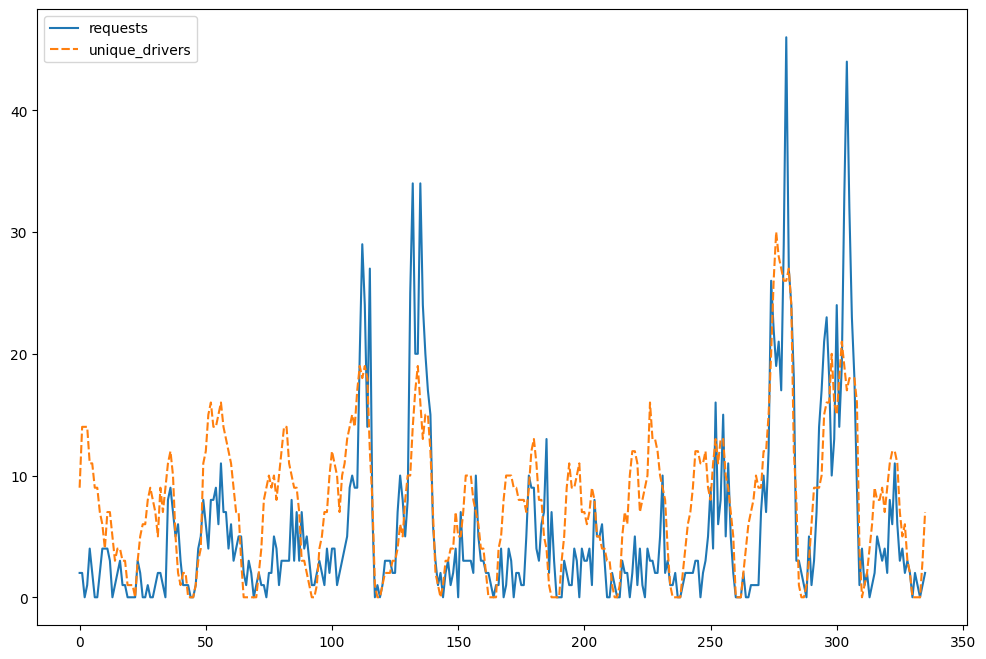

In [45]:
# Plot requests and unique drivers
plt.figure(figsize=(12, 8))
sns.lineplot(data=df[['requests', 'unique_drivers', 'timestamp']])
plt.show()

## Highest Zeroes to Eyeballs <a id='highest-zeroes-eyeballs'></a>

In which 72 hour period is the ratio of Zeroes to Eyeballs the highest?

- `Eyeballs` are when a person opened the Uber application.
- `Zeroes` are when a person opened the Uber application, and did not see any car.

In [46]:
# Drop `date` column
df_q8 = df.drop(columns='date')

In [47]:
# Set `timestamp` as index
df_q8 = df_q8.set_index('timestamp')

In [48]:
# Calculate rolling sum by 3 days (72 hours)
indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=72)
df_q8 = df_q8.rolling(window=indexer, min_periods=1).sum().reset_index()

In [49]:
# Calculate zeros to eyeballs ratio
df_q8['zeroes_to_eyeballs_ratio'] = df_q8['zeroes'] / df_q8['eyeballs']

In [50]:
# Keep only rows from last 72 hours
df_q8 = df_q8[df_q8['timestamp'] <= (df_q8['timestamp'].max() - pd.DateOffset(days=3))]

In [51]:
# Set time format
time_format = "%Y/%m/%d %H:%M"

# Create `time_interval` column
df_q8['time_interval'] = df_q8['timestamp'].dt.strftime(time_format) +  " - " + (df_q8['timestamp'] + pd.Timedelta('3 days')).dt.strftime(time_format)

In [52]:
# Get highest zeroes to eyeballs ratio
max_zeroes_eyeballs = df_q8.nlargest(n=1, columns='zeroes_to_eyeballs_ratio')['zeroes_to_eyeballs_ratio'].values[0]

# Get time interval for highest zeroes to eyeballs ratio
max_zeroes_eyeballs_time_interval = df_q8.nlargest(n=1, columns='zeroes_to_eyeballs_ratio')['time_interval'].values[0]

In [53]:
# Print result
print(f'Highest zeroes to eyeballs ratio in 72 hours: {max_zeroes_eyeballs}')
print(f'72 hour period of highest zeroes to eyeballs ratio: {max_zeroes_eyeballs_time_interval}')

Highest zeroes to eyeballs ratio in 72 hours: 0.2929765886287625
72 hour period of highest zeroes to eyeballs ratio: 2012/09/15 05:00 - 2012/09/18 05:00


## Highest Eyeball to Driver <a id='highest-eyeball-driver'></a>

If you could add 5 drivers to any single hour of every day during the two week period, which hour should you add them to?

In [54]:
# Group by `time_local`, aggregate `eyeballs` and `unique_drivers` sum
df_q9 = df.groupby(by='time_local', as_index=False).agg(func={'eyeballs': 'sum', 'unique_drivers': 'sum'})

In [55]:
# Create eyeball to driver ratio
df_q9['eyeball_to_driver_ratio'] = df_q9['eyeballs'] / df_q9['unique_drivers']

In [56]:
# Get hour of highest eyeball to driver ratio
hour_add_driver = df_q9.nlargest(n=1, columns='eyeball_to_driver_ratio')['time_local'].values[0]

In [57]:
# Print results
print(f'Recommended hour to add drivers: {hour_add_driver}')

Recommended hour to add drivers: 23


## Analysis Time Frame <a id='analysis-time-frame'></a>

Are there exactly two weeks of data in this analysis?

In [58]:
# Calculate time difference between start and end, then compare to timedelta 14 days
two_weeks = df['timestamp'][df.shape[0] - 1] - df['timestamp'][0] == pd.Timedelta('14 days')

In [59]:
# Print results
print(f'Exactly two weeks of data: {two_weeks}')

Exactly two weeks of data: False


## Best End Day <a id='best-end-day'></a>

Looking at all of the data, which time might make the most sense to consider a true "end day" instead of midnight?

- When are both supply and demand at their natural minimums?

In [60]:
# Find minimum supply and demand per day
df_q11 = df.groupby(by='date', as_index=False).agg(min_supply_per_day=('unique_drivers', 'min'), min_demand_per_day=('requests', 'min'))

In [61]:
# Merge aggregated columns with original dataset on date
df_q11 = pd.merge(left=df, right=df_q11, on='date')

In [62]:
# Find hour when supply and demand are at natural minimums
min_hour = df_q11[(df_q11['min_supply_per_day'] == df_q11['unique_drivers']) & (df_q11['min_demand_per_day'] == df_q11['requests'])]['time_local'].mode()

In [63]:
# Print result
print(f'Hour of minimum supply and demand: {min_hour[0]}')

Hour of minimum supply and demand: 4


In [64]:
# Select numeric columns
df_agg_time = df.select_dtypes(include='number')

# Aggregate by `time_local` and sum columns
df_agg_time = df_agg_time.groupby(by='time_local', as_index=False).sum()

# Extract hour of minimum supply and demand
min_hour_value = df_agg_time['requests'][min_hour[0]]

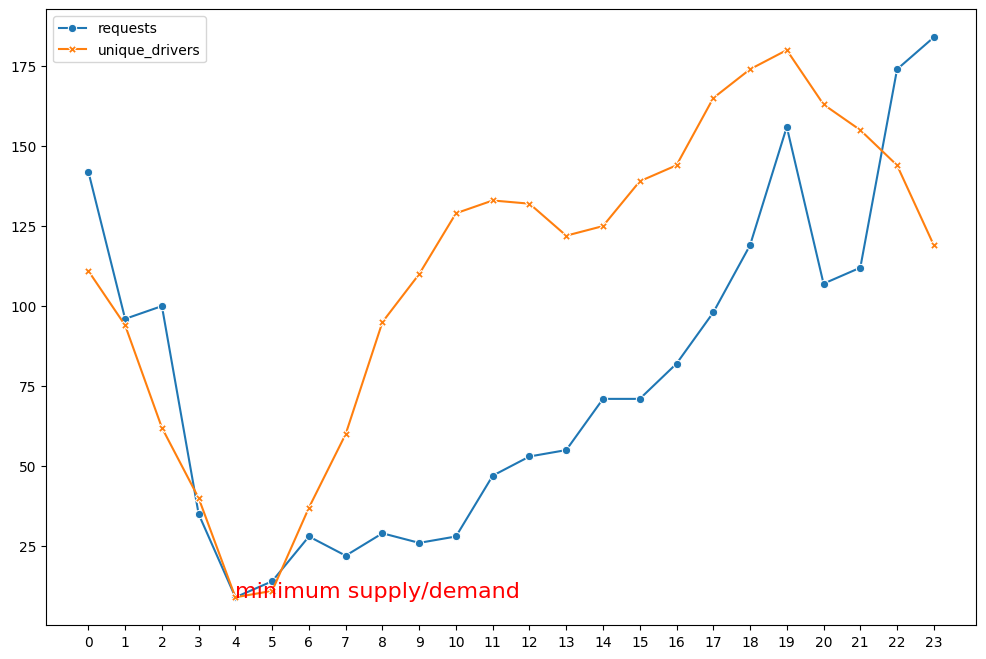

In [65]:
# Plot and annotate minimum hour

# Set figure size
plt.figure(figsize=(12, 8))

# Create line plot
fig = sns.lineplot(data=df_agg_time[['requests', 'unique_drivers']], markers=True, dashes=False)

# Set x-axis ticks to values in `time_local` column
fig.set_xticks(df_agg_time['time_local'])

# Add annotation to plot
plt.annotate('minimum supply/demand', xy=(min_hour[0], min_hour_value), color='r', fontsize=16)

# Display plot
plt.show()

- Supply and demand are at their natural minimums at 4 in the morning.
- A better end of day may be 4 am instead of 12 am midnight.

This notebook was inspired by the [Insights from City Supply and Demand Data](https://platform.stratascratch.com/data-projects/insights-city-supply-and-demand-data) data project on [StrataScratch](https://www.stratascratch.com/)